# BIG-FISHによるRNA-seqFISH輝点の検出

次に、以下の" "の間に、githubからダウンロードしたフォルダのパスを指定する。

In [1]:
import os
# 現在のディレクトリのパスを取得
current_directory = os.getcwd()
# 現在のディレクトリの2つ上の階層のパスを取得
dir = os.path.dirname(current_directory)

import numpy as np
import bigfish
import bigfish.stack as stack
import bigfish.detection as detection
import bigfish.multistack as multistack
import bigfish.plot as plot
print("Big-FISH version: {0}".format(bigfish.__version__))

def spot_detect_threshold(Pos_no, file_name, threshold):                
    path_input = os.path.join(dir, "1_processed_images", "3_diveded_files")

    path = os.path.join(path_input, Pos_no, file_name)
    # smFISHの画像を選択する。
    dna  = stack.read_image(path)

    # 画像表示用のMIP画像を生成
    dna_mip = stack.maximum_projection(dna)

    # 細胞核画像
    path = os.path.join(dir, "1_processed_images", "3_diveded_files", 
                        Pos_no, "ND53_C4_TyD.tif")
    nuc  = stack.read_image(path)
    nuc_mip = stack.maximum_projection(nuc)




    # Spot detection

    #以下はfiltering, local maximaの検出、最適な閾値の検出、閾値による輝点の検出を一度に実施する。

    spots = detection.detect_spots(
        images=dna, 
        threshold = threshold,
        return_threshold=False, 
        voxel_size=(130, 130, 130),  # in nanometer (one value per dimension zyx) これは固定。
        spot_radius=(240, 189, 189))  


    plot.plot_detection(dna_mip, spots, contrast=True)
    

    
def spot_detect(Pos_no, file_name):                
    path_input = os.path.join(dir, "1_processed_images", "3_diveded_files")

    path = os.path.join(path_input, Pos_no, file_name)
    # smFISHの画像を選択する。
    dna  = stack.read_image(path)

    # 画像表示用のMIP画像を生成
    dna_mip = stack.maximum_projection(dna)

    # 細胞核画像
    path = os.path.join(dir, "1_processed_images", "3_diveded_files", 
                        Pos_no, "ND53_C4_TyD.tif")
    nuc  = stack.read_image(path)
    nuc_mip = stack.maximum_projection(nuc)




    # Spot detection

    #以下はfiltering, local maximaの検出、最適な閾値の検出、閾値による輝点の検出を一度に実施する。

    spots, threshold = detection.detect_spots(
                        images=dna, 
                        return_threshold=True, 
                        voxel_size=(130, 130, 130),
                        spot_radius=(240, 189, 189))

    print("Threshold : ", threshold)
    plot.plot_detection(dna_mip, spots, contrast=True)
    return threshold

Big-FISH version: 0.6.2


まず最初に、すべてのseqFISH画像について、輝点検出の閾値を事前に決定しておく。
決めた閾値は以下に記載する。
/Volumes/Public-TS-873/Microscope/Ochiai/221223-DNA-RNA-seqFISH/230107-DNA-RNA-seqFISH-probe-summary.csv

In [ ]:
Pos_no = "Pos01"

name_list = [f"ND{str(i).zfill(2)}_C{j}_TyR" for i in range(2, 29) for j in range(1, 4)]
threshold_list = []

for i in name_list :
    print(i)
    file_name = i +'.tif'
    threshold = spot_detect(Pos_no, file_name)
    threshold_list.append(threshold)

以下は要検討

ND18_C1_TyR (もっと閾値下げる)
ND20_C1_TyR (もっと閾値下げる)
ND21_C1_TyR (もっと閾値下げる)
ND24_C1_TyR (2つの強度の蛍光がある。variantの可能性?細胞質に強い輝点がある)
ND26_C1_TyR(もっと閾値下げる)
ND02_C2_TyR (バックグラウンドが高いので閾値の調整が必要)
ND03_C2_TyR (バックグラウンドが高いので閾値の調整が必要、細胞核に強烈にシグナル有る)
ND06_C2_TyR (もっと閾値あげる。これはおそらく輝点が無い)
ND15_C2_TyR (もっと閾値あげる。これはおそらく輝点が非常に少ない)
ND16_C2_TyR (もっと閾値あげる。これはおそらく輝点が非常に少ない)
ND17_C2_TyR (これはこのままでもいいかも。これはおそらく輝点が非常に少ない)
ND18_C2_TyR  (もっと閾値あげる。これはおそらく輝点が非常に少ない)
ND23_C2_TyR (もっと閾値あげる。これはおそらく輝点が非常に少ない??)
ND24_C2_TyR (もっと閾値あげる。これはおそらく輝点が非常に少ない)
ND25_C2_TyR (染まりすぎ、使えないかも)
ND27_C2_TyR (もっと閾値あげる。これはおそらく輝点が無い)
ND28_C2_TyR (もっと閾値あげる。これはおそらく輝点が非常に少ない)
ND10_C3_TyR (もっと閾値あげる。これはおそらく輝点が無い)
ND21_C3_TyR
ND23_C3_TyR (???)

以下では個別に閾値を設定して、閾値を変更する。


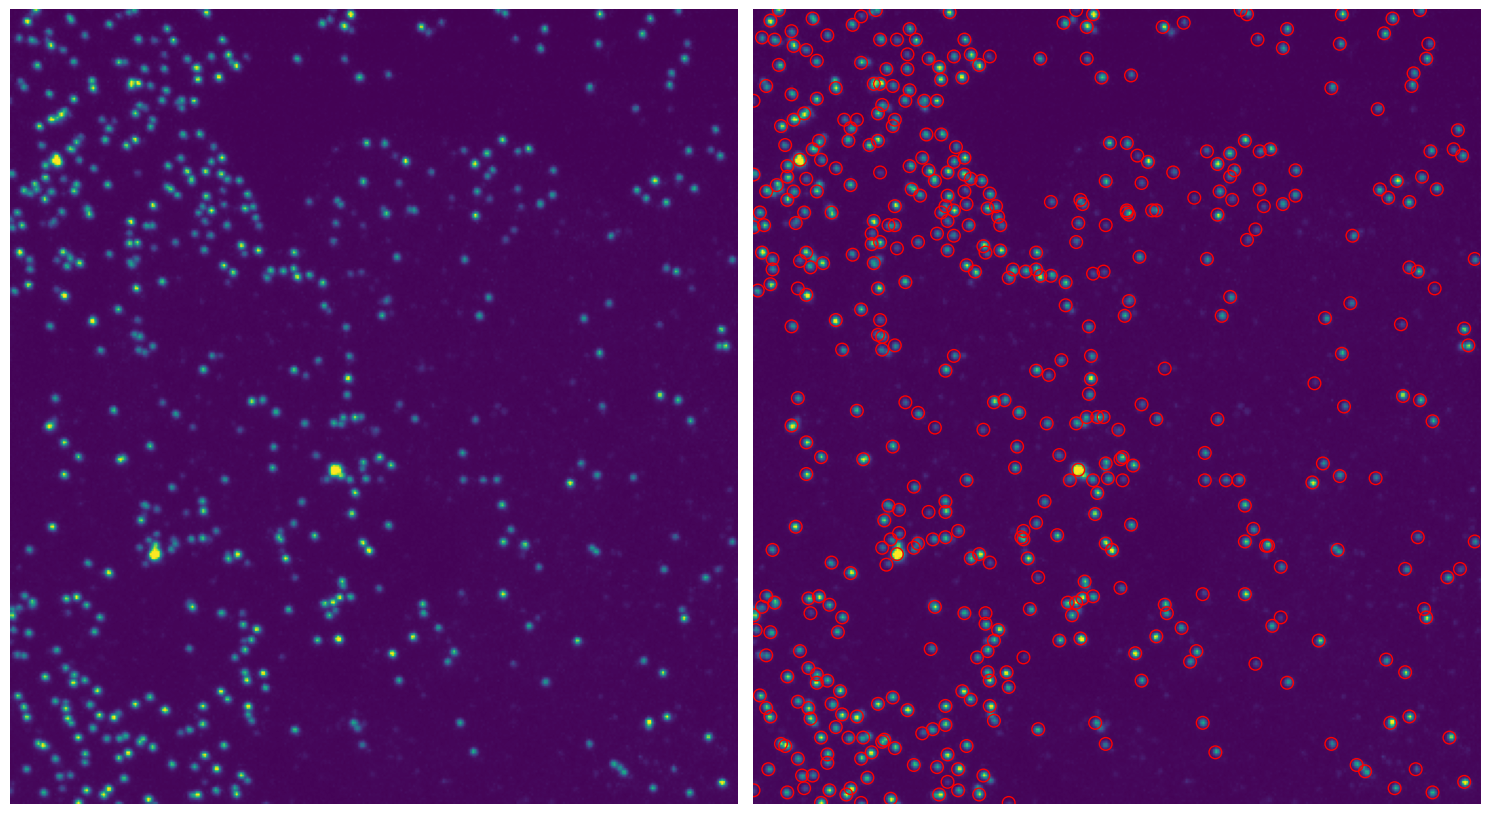

In [8]:
Pos_no = "Pos03"

file_name = 'ND03_C1_TyR'+'.tif'
threshold = 43
    

spot_detect_threshold(Pos_no, file_name, threshold)

以下ではまとめて輝点検出を行う

In [ ]:
import pandas as pd

reference_data = pd.read_csv(os.path.join(dir, "X1_accessory_data", "DNA-RNA-seqFISH-probe-summary.csv"))
reference_data = reference_data.reset_index()
reference_data = reference_data.loc[(reference_data['exp_type']=='RNA_seqFISH') &
                                                   (~reference_data['Threshold'].isnull()),:]


path_output = os.path.join(dir, "1_processed_images", "6_RNA_seqFISH_spot_detection")
# 指定されたパスにディレクトリが存在しない場合、ディレクトリを作成
if not os.path.exists(path_output):
    os.makedirs(path_output)

for pos in range(1,4):
    Pos_no = 'Pos' + str(pos).zfill(2)
    for stack_no in range(len(reference_data)):
        Stack_ID = str(reference_data.Stack_ID.values[stack_no])
        gene_name = reference_data.loc[reference_data['Stack_ID']==Stack_ID,'target_ID'].values[0]
        file_name = Stack_ID + '.tif'
        threshold = reference_data.loc[reference_data['Stack_ID']==Stack_ID,'Threshold'].values[0]

        path_input = os.path.join(dir, "1_processed_images", "3_diveded_files")

        path = os.path.join(path_input, Pos_no, file_name)
        # smFISHの画像を選択する。
        dna  = stack.read_image(path)

        # 画像表示用のMIP画像を生成
        dna_mip = stack.maximum_projection(dna)


        # Spot detection
        #以下はfiltering, local maximaの検出、最適な閾値の検出、閾値による輝点の検出を一度に実施する。

        spots = detection.detect_spots(
            images=dna, 
            threshold = threshold,
            return_threshold=False, 
            voxel_size=(130, 130, 130),  # in nanometer (one value per dimension zyx) これは固定。
            spot_radius=(240, 189, 189))  


        spots_post_decomposition, dense_regions, reference_spot = detection.decompose_dense(
            image=dna, 
            spots=spots, 
            voxel_size=(200, 130, 130), 
            spot_radius=(233, 189, 189), 
            alpha=0.7,  # alpha impacts the number of spots per candidate region
            beta=1,  # beta impacts the number of candidate regions to decompose
            gamma=5)  # gamma the filtering step to denoise the image

        spots_post_clustering, clusters = detection.detect_clusters(
            spots=spots_post_decomposition, 
            voxel_size=(200, 130, 130), 
            radius=350, # 要検討
            nb_min_spots=3) # 要検討。ちなみに、この例では4にすると何も出てこない。
        
        
        # ここで、clustersをそれぞれどの細胞核に帰属するのか、情報を振っておく。
        
        if len(clusters)>0:
            # 最後の列に0を付加する。これは細胞IDに相当する。
            b = np.stack([0 for _ in range(clusters.shape[0])], axis=0)
            clusters = np.insert(clusters, 5, b, axis=1)
            
            for i in range(len(clusters)):
                path_input = os.path.join(dir,"1_processed_images","4_segmentation")
                nuc_file_name = "02_nuc_seg_human_corrected.tif"

                path = os.path.join(path_input, Pos_no, nuc_file_name)
                # smFISHの画像を選択する。
                nuc_seg  = stack.read_image(path)
                a = clusters[i][0:3]
                nuc_id = nuc_seg[a[0]][a[1]][a[2]]
                clusters[i][5] = nuc_id
                
        
        
        path_output = os.path.join(dir,"1_processed_images","6_RNA_seqFISH_spot_detection")
        path = os.path.join(path_output, Pos_no, 'img',Stack_ID + '_' + gene_name + '.png')
        
        if not os.path.exists(os.path.join(path_output, Pos_no, 'img')):
            os.makedirs(os.path.join(path_output, Pos_no, 'img'))

        plot.plot_detection(dna_mip, 
                            spots=[spots_post_decomposition, clusters[:, :3]], 
                            shape=["circle", "polygon"], 
                            radius=[3, 6], 
                            color=["red", "blue"],
                            linewidth=[1, 2], 
                            fill=[False, True], 
                            contrast=True,
                            title=Stack_ID + '_' + gene_name,
                            path_output=path, ext='png', show=False)


        # save in csv files
        path = os.path.join(path_output, Pos_no, Stack_ID + '_' + gene_name + "spots.csv")
        stack.save_data_to_csv(spots_post_clustering, path)
        path = os.path.join(path_output, Pos_no, Stack_ID + '_' + gene_name + "clusters.csv")
        #それぞれの列が、z, y, x, no_of_transcript, cluster_id, cell_id
        stack.save_data_to_csv(clusters, path)